In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Data Preparation
train_dir = 'data//train'  # Directory containing training images organized in subfolders by class
valid_dir = 'data//test'  # Directory for validation data

In [4]:
# Image Data Generator for loading and augmenting data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing specific to MobileNetV3
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 287 images belonging to 9 classes.
Found 72 images belonging to 9 classes.


In [5]:
import mob
base_model = mobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (optional, to only train the top layers)
base_model.trainable = False

# Step 3: Create a New Model on Top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
])

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10  # Adjust based on dataset size
)

# Step 6: Save the Model
model.save('mobilenetv3_fruit_classifier.keras')

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9282 - loss: 0.2769 - val_accuracy: 0.7917 - val_loss: 0.7267
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 962ms/step - accuracy: 0.9247 - loss: 0.2324 - val_accuracy: 0.8611 - val_loss: 0.6044
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 848ms/step - accuracy: 0.9493 - loss: 0.2135 - val_accuracy: 0.8194 - val_loss: 0.6525
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 792ms/step - accuracy: 0.9521 - loss: 0.1569 - val_accuracy: 0.8056 - val_loss: 0.7132
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 826ms/step - accuracy: 0.9350 - loss: 0.2093 - val_accuracy: 0.8472 - val_loss: 0.6386
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 842ms/step - accuracy: 0.9608 - loss: 0.1459 - val_accuracy: 0.8472 - val_loss: 0.6148
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 826ms/step - accuracy: 0.9278 - loss: 0.1925 - val_accuracy: 0.8194 - val_loss: 0.7092
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 786ms/step - accuracy: 0.9740 - loss: 0.0985 - val_accuracy: 0.8194 - val_

In [12]:
model.sav

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,164,173 (4.44 MB)

 Trainable params: 75,017 (293.04 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 150,036 (586.08 KB)

In [11]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("fruit_classifier.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("fruit_classifier.h5")
print("Saved model to disk")

AttributeError: 'Sequential' object has no attribute 'to_yaml'

In [7]:
# Step 7: Predict Function
def predict_fruit(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = preprocess_input(img_array)  # Preprocess input image for MobileNetV3
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict fruit name
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())
    fruit_name = class_labels[predicted_class]

    print(f"Predicted Fruit: {fruit_name}")
    return fruit_name



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Fruit: chickoo


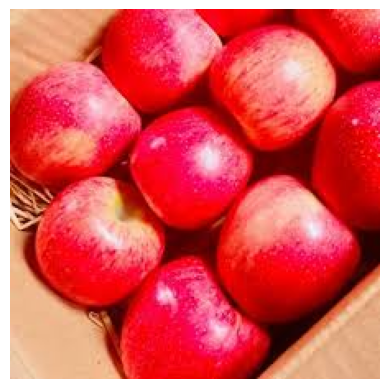

In [10]:
image_path = "Apple (545).jpeg"

# Example Prediction
predict_fruit(image_path, model)

# Display Sample Prediction Image
plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
plt.axis('off')
plt.show()